# CSC2034 Major Project in Data Science - Vinho Verde Wine Investigation
### Oliver El-kheir | Student Number: 190343231

Set up environment and load datasets:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
red_df = pd.read_csv('../data_sets/winequality-red.csv', sep=';')
white_df = pd.read_csv('../data_sets/winequality-white.csv', sep=';')
sns.set_theme(style='darkgrid')

# Feature Selection
Selecting the right variables is an important task to improve the accuracy of a machine learning prediction model. The first section of this report analyses the correlation between independent variables; and the correlation between each independent variable and the dependent variable (perceived quality) to determine which variables are most important for a machine learning model.

## Quality Distribution Comparison

The graphs below show the perceived quality distribution for the red and white wines as a whole.

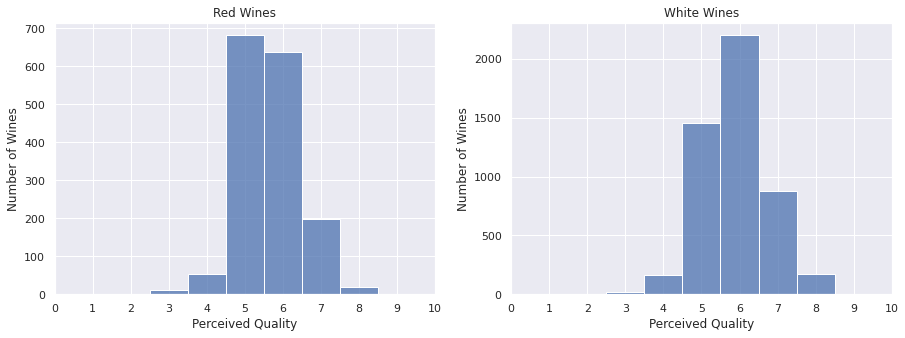

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(red_df['quality'], discrete=True, bins=10, binwidth=1, ax=axs[0])
axs[0].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[0].set_title("Red Wines")
sns.histplot(white_df['quality'], discrete=True, bins=10, binwidth=1, ax=axs[1])
axs[1].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[1].set_title("White Wines")
plt.show()

The small standard deviation (σ) in both sets shows that testers were reluctant to rate wines low and high, instead giving most wines a 5 or 6 rating. The higher spread and mean (μ) in the white set is due to the slightly greater proportion of 7 and 8 rated wines compared to the greater proportion of 5 rated wines in the red set. Both sets are relatively normally distributed. A well-trained model will produce a similar distribution in its predictions.

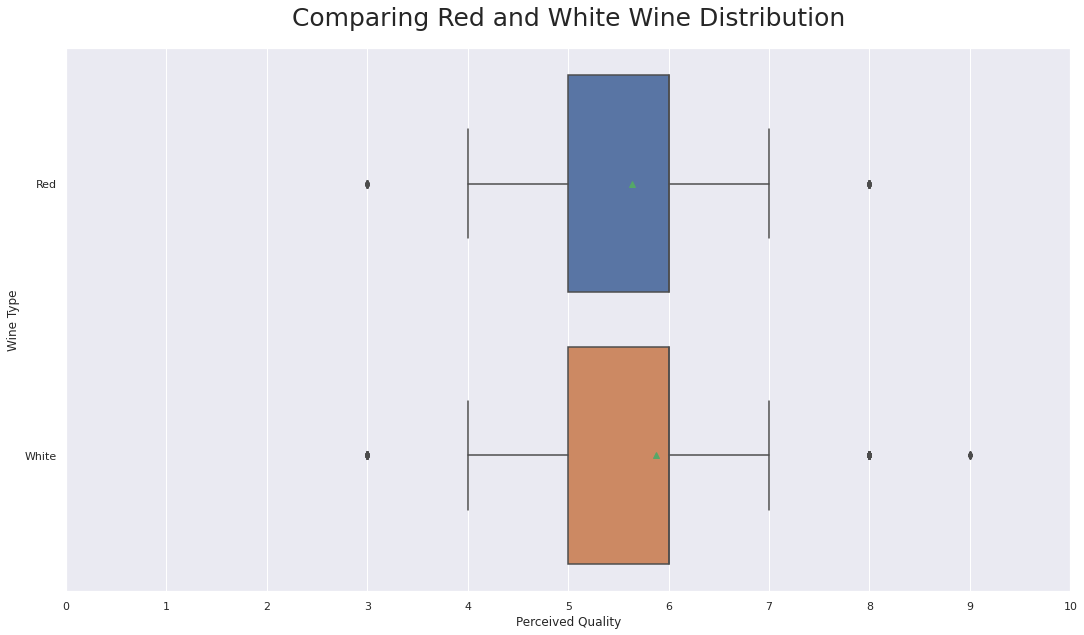

In [3]:
concat_df = pd.concat([red_df, white_df], keys=['Red', 'White'], names=['wine_type']).reset_index()
plt.figure(figsize=(18, 10))
quality_bp = sns.boxplot(x='quality', y='wine_type', data=concat_df, showmeans=True)
quality_bp.set(xlabel='Perceived Quality', ylabel='Wine Type', xlim=(0, 10), xticks=(np.arange(11)))
quality_bp.set_title('Comparing Red and White Wine Distribution', fontsize=25, y=1.03)
plt.show()

The distribution of quality in red and white wines is almost identical. The white wine dataset has a few more highly rated outliers. Both sets have no meaningful skew due to their normal distribution. White wines have a slightly higher perceived quality than red wines.

## Quality Distribution Comparison (Alcohol Content)

Below shows an analysis of the distribution of percevied quality across both datasets, based on the corresponding alcohol content of the wine. Alcohol content was discretised into three categories: low (x < μ - σ), medium (μ - σ <= x <= μ + σ), and high (x > μ + σ).

In [4]:
red_df['alcohol_cat'] = 'none'
white_df['alcohol_cat'] = 'none'
red_mean_alc = red_df['alcohol'].mean()
white_mean_alc = white_df['alcohol'].mean()
red_std_alc = red_df['alcohol'].std()
white_std_alc = white_df['alcohol'].std()
for i in range(len(red_df)):
    if red_df.at[i, 'alcohol'] < red_mean_alc - red_std_alc:
        red_df.at[i, 'alcohol_cat'] = 'low'
    elif red_mean_alc - red_std_alc <= red_df.at[i, 'alcohol'] <= red_mean_alc + red_std_alc:
        red_df.at[i, 'alcohol_cat'] = 'medium'
    else:
        red_df.at[i, 'alcohol_cat'] = 'high'  
for i in range(len(white_df)):
    if white_df.at[i, 'alcohol'] < white_mean_alc - white_std_alc:
        white_df.at[i, 'alcohol_cat'] = 'low'
    elif white_mean_alc - white_std_alc <= white_df.at[i, 'alcohol'] <= white_mean_alc + white_std_alc:
        white_df.at[i, 'alcohol_cat'] = 'medium'
    else:
        white_df.at[i, 'alcohol_cat'] = 'high'
red_alc_low = red_df[red_df['alcohol_cat'] == 'low']
red_alc_med = red_df[red_df['alcohol_cat'] == 'medium']
red_alc_high = red_df[red_df['alcohol_cat'] == 'high']
white_alc_low = white_df[white_df['alcohol_cat'] == 'low']
white_alc_med = white_df[white_df['alcohol_cat'] == 'medium']
white_alc_high = white_df[white_df['alcohol_cat'] == 'high']

Below are plots showing the distribution of perceived quality for each of the three alcohol categories for red and white wines.

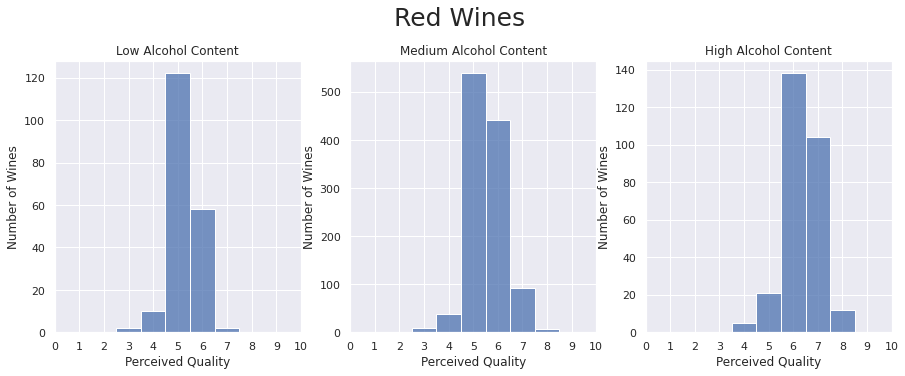

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Red Wines", fontsize=25, y=1.03)
sns.histplot(red_alc_low['quality'], discrete=True, bins=10, binwidth=1, ax=axs[0])
axs[0].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[0].set_title("Low Alcohol Content")
sns.histplot(red_alc_med['quality'], discrete=True, bins=10, binwidth=1, ax=axs[1])
axs[1].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[1].set_title("Medium Alcohol Content")
sns.histplot(red_alc_high['quality'], discrete=True, bins=10, binwidth=1, ax=axs[2])
axs[2].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[2].set_title("High Alcohol Content")
plt.show()

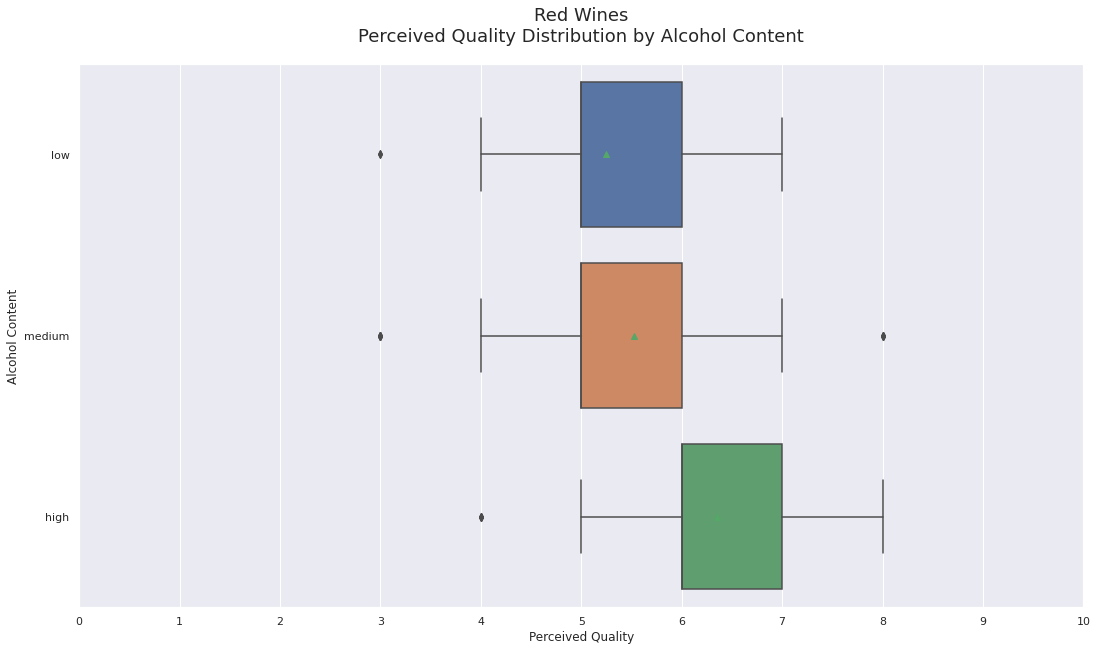

In [6]:
plt.figure(figsize=(18, 10))
red_alc_bp = sns.boxplot(x='quality', y='alcohol_cat', data=red_df, showmeans=True, 
                         order=['low', 'medium', 'high'])
red_alc_bp.set(xlabel='Perceived Quality', ylabel='Alcohol Content', xlim=(0, 10), xticks=(np.arange(11)))
red_alc_bp.set_title('Red Wines\nPerceived Quality Distribution by Alcohol Content', fontsize=18, y=1.03)
plt.show()

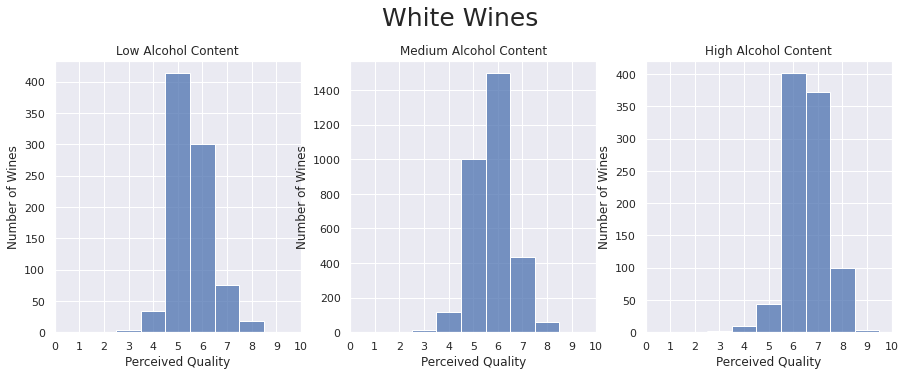

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("White Wines", fontsize=25, y=1.03)
sns.histplot(white_alc_low['quality'], discrete=True, bins=10, binwidth=1, ax=axs[0])
axs[0].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[0].set_title("Low Alcohol Content")
sns.histplot(white_alc_med['quality'], discrete=True, bins=10, binwidth=1, ax=axs[1])
axs[1].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[1].set_title("Medium Alcohol Content")
sns.histplot(white_alc_high['quality'], discrete=True, bins=10, binwidth=1, ax=axs[2])
axs[2].set(xlabel='Perceived Quality', ylabel='Number of Wines', xlim=(0, 10), xticks=(np.arange(11)))
axs[2].set_title("High Alcohol Content")
plt.show()

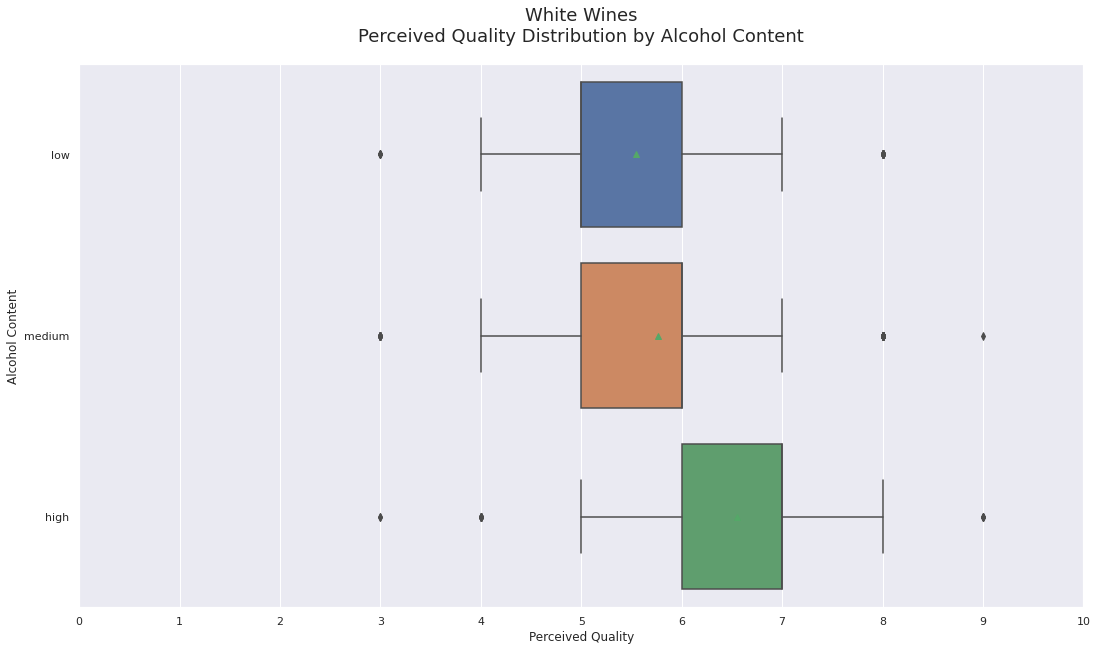

In [8]:
plt.figure(figsize=(18, 10))
red_alc_bp = sns.boxplot(x='quality', y='alcohol_cat', data=white_df, showmeans=True, 
                         order=['low', 'medium', 'high'])
red_alc_bp.set(xlabel='Perceived Quality', ylabel='Alcohol Content', xlim=(0, 10), xticks=(np.arange(11)))
red_alc_bp.set_title('White Wines\nPerceived Quality Distribution by Alcohol Content', fontsize=18, y=1.03)
plt.show()

For both red and white wines, the greater the alcohol content, the higher the perceived quality. There is a negative skew for high alcohol content compared to low and medium, for both wines. The positive correlation between alcohol content and perceived quality is stronger in red wines than white wines. Alcohol content is a strong indicator of perceived quality overall. Alcohol content is an important variable for training the model.

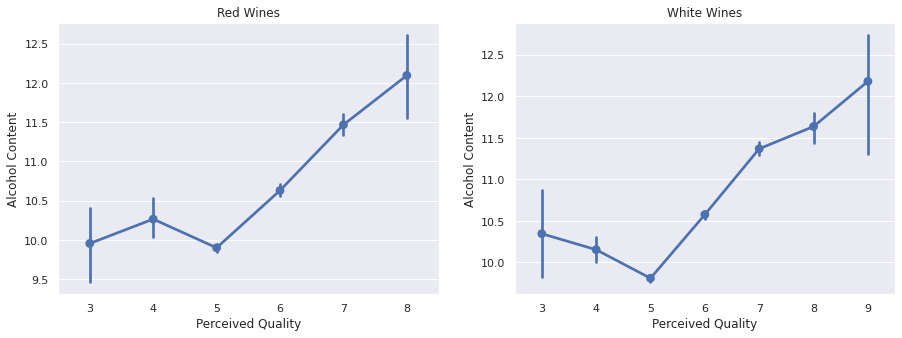

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.pointplot(x='quality', y='alcohol', data=red_df, ax=axs[0])
axs[0].set(xlabel='Perceived Quality', ylabel='Alcohol Content')
axs[0].set_title("Red Wines")
sns.pointplot(x='quality', y='alcohol', data=white_df, ax=axs[1])
axs[1].set(xlabel='Perceived Quality', ylabel='Alcohol Content')
axs[1].set_title("White Wines")
plt.show()

# Categorising Residual Sugar
The correlation between residual sugar and perceived quality was evaluated.

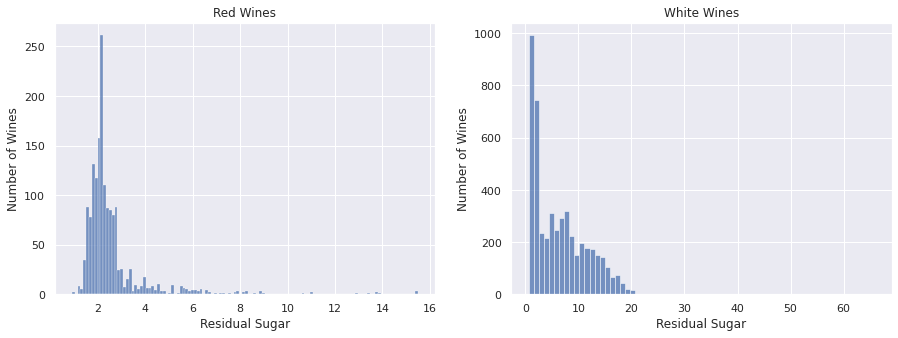

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(red_df['residual sugar'], ax=axs[0])
axs[0].set(xlabel='Residual Sugar', ylabel='Number of Wines')
axs[0].set_title("Red Wines")
sns.histplot(white_df['residual sugar'], ax=axs[1])
axs[1].set(xlabel='Residual Sugar', ylabel='Number of Wines')
axs[1].set_title("White Wines")
plt.show()

Residual sugar has a strong positive skew in both red and white wines making the data unfavourable for machine learning models without further analysis.

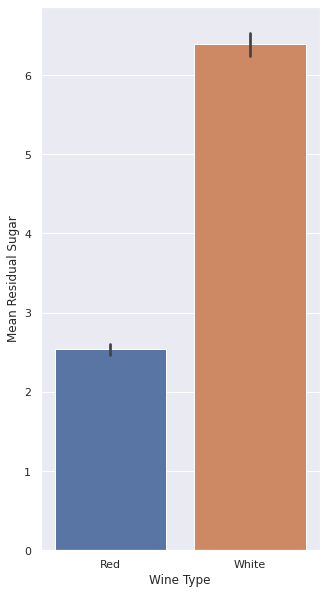

In [11]:
plt.figure(figsize=(5, 10))
res_sug_bp = sns.barplot(y='residual sugar', x='wine_type', data=concat_df)
res_sug_bp.set(xlabel='Wine Type', ylabel='Mean Residual Sugar')
plt.show()

**The average (μ) residual sugar in the white wine dataset is 2.5 times greater than in the red.**

In [12]:
red_df['isSweet'] = 'none'
white_df['isSweet'] = 'none'
for i in range(len(red_df)):
    if red_df.at[i, 'residual sugar'] <= 2.15:
        red_df.at[i, 'isSweet'] = 'dry'
    else:
        red_df.at[i, 'isSweet'] = 'sweet'
for i in range(len(white_df)):
    if white_df.at[i, 'residual sugar'] <= 5.16:
        white_df.at[i, 'isSweet'] = 'dry'
    else:
        white_df.at[i, 'isSweet'] = 'sweet'
red_dry = red_df[red_df['isSweet'] == 'dry']
red_sweet = red_df[red_df['isSweet'] == 'sweet']
white_dry = white_df[white_df['isSweet'] == 'dry']
white_sweet = white_df[white_df['isSweet'] == 'sweet']

Residual sugar was discretised into two categories for the red and white wines: dry and sweet. A threshold value was found to split each dataset by roughly half. The threshold was 2.15 for red wines and 5.16 for white wines. There is a much weaker skew in dry wines (residual sugar less than threshold), although sweet wines are still quite strongly positively skewed. Calculating the correlation between residual sugar and perceived quality will be more accurate in dry wines due to the minimised skew.

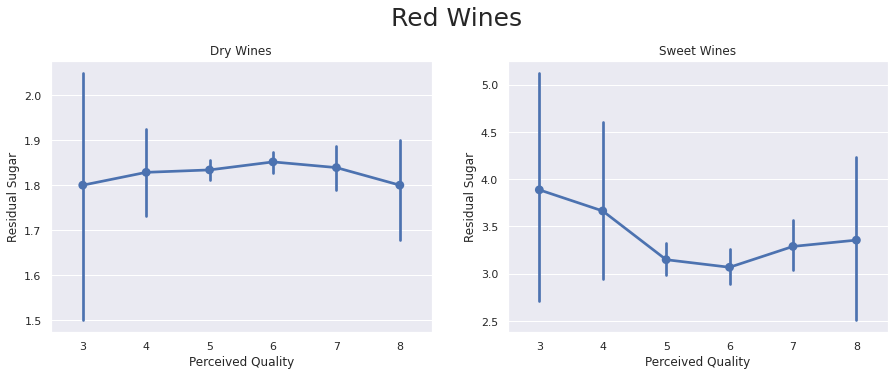

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Red Wines", fontsize=25, y=1.03)
sns.pointplot(x='quality', y='residual sugar', data=red_dry, ax=axs[0])
axs[0].set(xlabel='Perceived Quality', ylabel='Residual Sugar')
axs[0].set_title("Dry Wines")
sns.pointplot(x='quality', y='residual sugar', data=red_sweet, ax=axs[1])
axs[1].set(xlabel='Perceived Quality', ylabel='Residual Sugar')
axs[1].set_title("Sweet Wines")
plt.show()

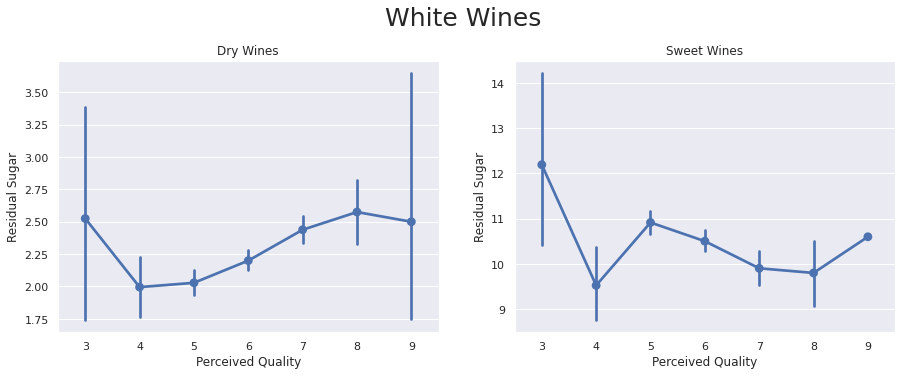

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("White Wines", fontsize=25, y=1.03)
sns.pointplot(x='quality', y='residual sugar', data=white_dry, ax=axs[0])
axs[0].set(xlabel='Perceived Quality', ylabel='Residual Sugar')
axs[0].set_title("Dry Wines")
sns.pointplot(x='quality', y='residual sugar', data=white_sweet, ax=axs[1])
axs[1].set(xlabel='Perceived Quality', ylabel='Residual Sugar')
axs[1].set_title("Sweet Wines")
plt.show()

In [15]:
pd.DataFrame([[red_dry.corr(method='spearman')['quality']['residual sugar'], 
               red_sweet.corr(method='spearman')['quality']['residual sugar']], 
              [white_dry.corr(method='spearman')['quality']['residual sugar'], 
               white_sweet.corr(method='spearman')['quality']['residual sugar']]], 
             index=['Red', 'White'], columns=['Dry', 'Sweet'])

,Dry,Sweet
Red,0.037930,-0.015643
White,0.168603,-0.079723


**The above table shows the spearman correlation between residual sugar and perceived quality for each type of wine.**

As shown above there is a weak correlation between the residual sugar and the perceived quality for both dry and sweet wines in the red datatset and sweet wines in the white dataset. Dry white wines show a greater correlation between residual sugar and perceived quality. Residual sugar is, on the whole, a weak variable to include in the model, especially in the red wines.

# Variable Correlation
Below shows a table of the spearman correlation between each independant variable and the dependant variable (perceived quality). The value of each negative correlation is multiplied by -1 to rank each variable by correlation strength and ignore positive or negative correlation.
## Red Wines

In [16]:
pd.DataFrame(red_df.corr('spearman')['quality'].map(lambda x : x * -1 if x < 0 else x)).drop(['quality']).sort_values(ascending=False, by=['quality'])

,quality
alcohol,0.478532
volatile acidity,0.380647
sulphates,0.377060
citric acid,0.213481
total sulfur dioxide,0.196735
chlorides,0.189922
density,0.177074
fixed acidity,0.114084
free sulfur dioxide,0.056901
pH,0.043672


The 6 most significant variables will be used to train the model.

In [17]:
pd.DataFrame(red_df.corr('spearman')['quality'].drop(['quality', 'residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'density'])).sort_values(ascending=False, by='quality')

,quality
alcohol,0.478532
sulphates,0.377060
citric acid,0.213481
chlorides,-0.189922
total sulfur dioxide,-0.196735
volatile acidity,-0.380647


Next, a pearson correlation is calculated for each of the chosen variables. It is unnecessary to include a pair of variables with a greater/less than +/-0.35 correlation, in this case citric acid and chlorides can be ommited.

In [18]:
red_df.corr(method='pearson').drop(index=['quality', 'residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'density'], columns=['quality', 'residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'density'])

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol
volatile acidity,1.000000,-0.552496,0.061298,0.076470,-0.260987,-0.202288
citric acid,-0.552496,1.000000,0.203823,0.035533,0.312770,0.109903
chlorides,0.061298,0.203823,1.000000,0.047400,0.371260,-0.221141
total sulfur dioxide,0.076470,0.035533,0.047400,1.000000,0.042947,-0.205654
sulphates,-0.260987,0.312770,0.371260,0.042947,1.000000,0.093595
alcohol,-0.202288,0.109903,-0.221141,-0.205654,0.093595,1.000000


Therefore, the most significant variables for training the red wine model are:
* **Alcohol**
* **Sulphates**
* **Total Sulfur Dioxide**
* **Volatile Acidity**

## White Wines
Below shows a table of the spearman correlation between each independant variable and the dependant variable (perceived quality). The value of each negative correlation is multiplied by -1 to rank each variable by correlation strength and ignore positive or negative correlation.

In [19]:
pd.DataFrame(white_df.corr('spearman')['quality'].map(lambda x : x * -1 if x < 0 else x)).drop(['quality']).sort_values(ascending=False, by=['quality'])

,quality
alcohol,0.440369
density,0.348351
chlorides,0.314488
total sulfur dioxide,0.196680
volatile acidity,0.196562
pH,0.109362
fixed acidity,0.084485
residual sugar,0.082070
sulphates,0.033319
free sulfur dioxide,0.023713


The 6 most significant variables will be used to train the model.

In [20]:
pd.DataFrame(white_df.corr('spearman')['quality'].drop(['quality', 'residual sugar', 'citric acid', 'free sulfur dioxide', 'sulphates', 'fixed acidity', 'pH'])).sort_values(ascending=False, by='quality')

,quality
alcohol,0.440369
volatile acidity,-0.196562
total sulfur dioxide,-0.196680
chlorides,-0.314488
density,-0.348351


Next, a pearson correlation is calculated for each of the chosen variables. It is unnecessary to include a pair of variables with a greater/less than +/-0.35 correlation, in this case citric acid and chlorides can be ommited.

In [21]:
white_df.corr(method='pearson').drop(index=['quality', 'residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'citric acid'], columns=['quality', 'residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'citric acid'])

,volatile acidity,chlorides,total sulfur dioxide,density,sulphates,alcohol
volatile acidity,1.000000,0.070512,0.089261,0.027114,-0.035728,0.067718
chlorides,0.070512,1.000000,0.198910,0.257211,0.016763,-0.360189
total sulfur dioxide,0.089261,0.198910,1.000000,0.529881,0.134562,-0.448892
density,0.027114,0.257211,0.529881,1.000000,0.074493,-0.780138
sulphates,-0.035728,0.016763,0.134562,0.074493,1.000000,-0.017433
alcohol,0.067718,-0.360189,-0.448892,-0.780138,-0.017433,1.000000


There is no significant correlation between the chosen independent variables and so none are ommited.

Therefore, the most significant variables for training the white wine model are:
* **Alcohol**
* **Volatile Acidity**
* **Total Sulfur Dioxide**
* **Chlorides**
* **Density**

# Binary Classification
### Red Wines
A binary classification model is trained and then tested using k-fold cross validation. First for red wines and then white.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

The specific model chosen is a three-layered dense neural network with binary crossentropy as the loss function and the sigmoid function as the output layer activation function.

In [23]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=(10))

In [24]:
def create_binary_model_red():
    model = Sequential()
    model.add(Dense(12, input_dim=4, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
red_ds = red_df.drop(columns=['residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'density', 'citric acid', 'chlorides', 'quality', 'alcohol_cat', 'isSweet']).to_numpy()

In [26]:
red_model_evaluate = KerasClassifier(build_fn=create_binary_model_red, epochs=500, batch_size=128, verbose=0)

The following code will perform k-fold cross validation on the model using 5 splits into training and test sets. This will be repeated for each perceived quality threshold from 4 to 8 for perceived quality. The model uses mini-batch gradient descent on the training set. **This may take some time.**

In [27]:
def run_k_fold_red():
    for i in range(4, 9):
        red_td = red_df['quality'].map(lambda x : 1 if x >= i else 0).to_numpy()
        print('Executing k-fold cross validation, k=5. Quality Threshold: low < ' + str(i) + ' <= high')
        red_model_result = cross_val_score(red_model_evaluate, red_ds, red_td, cv=kfold)
        print('--------------\nComplete, mean accuracy: ' + '{:.2f}'.format(red_model_result.mean() * 100) + '% (' + '{:.2f}'.format(red_model_result.std()) + ' std. dev.)\n--------------')
%timeit -n 1 -r 1 run_k_fold_red()

Executing k-fold cross validation, k=5. Quality Threshold: low < 4 <= high
--------------
Complete, mean accuracy: 99.25% (0.00 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 5 <= high
--------------
Complete, mean accuracy: 95.93% (0.00 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 6 <= high
--------------
Complete, mean accuracy: 73.30% (0.01 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 7 <= high
--------------
Complete, mean accuracy: 87.12% (0.01 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 8 <= high
--------------
Complete, mean accuracy: 98.87% (0.00 std. dev.)
--------------
1min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### White Wines
The same model is run for the white wine dataset. 

In [28]:
def create_binary_model_white():
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
white_ds = white_df.drop(columns=['residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'citric acid', 'sulphates', 'quality', 'alcohol_cat', 'isSweet']).to_numpy()

In [30]:
white_model_evaluate = KerasClassifier(build_fn=create_binary_model_white, epochs=500, batch_size=128, verbose=0)

The same k-fold cross validation is performed on the model with the white wine dataset using 5 folds for each perceived quality threshold. **This may take some time.**

In [31]:
def run_k_fold_white():
    for i in range(4, 9):
        white_td = white_df['quality'].map(lambda x : 1 if x >= i else 0).to_numpy()
        print('Executing k-fold cross validation, k=5. Quality Threshold: low < ' + str(i) + ' <= high...')
        white_model_result = cross_val_score(white_model_evaluate, white_ds, white_td, cv=kfold)
        print('--------------\nComplete, mean accuracy: ' + '{:.2f}'.format(white_model_result.mean() * 100) + '% (' + '{:.2f}'.format(white_model_result.std()) + ' std. dev.)\n--------------')
%timeit -n 1 -r 1 run_k_fold_white()

Executing k-fold cross validation, k=5. Quality Threshold: low < 4 <= high...
--------------
Complete, mean accuracy: 99.61% (0.00 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 5 <= high...
--------------
Complete, mean accuracy: 96.35% (0.00 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 6 <= high...
--------------
Complete, mean accuracy: 73.50% (0.02 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 7 <= high...
--------------
Complete, mean accuracy: 79.50% (0.00 std. dev.)
--------------
Executing k-fold cross validation, k=5. Quality Threshold: low < 8 <= high...
--------------
Complete, mean accuracy: 96.33% (0.00 std. dev.)
--------------
4min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Comparing Model Accuracy for Each Dataset
As calculated above, the binary classification threshold of 6 gives the least accurate, but most useful model. Below the accuracy of the model on the white and red datasets are compared with a perceived quality threshold of 6.

In [32]:
white_td = white_df['quality'].map(lambda x : 1 if x >= 6 else 0).to_numpy()
red_td = red_df['quality'].map(lambda x : 1 if x >= 6 else 0).to_numpy()

Each red and white wine dataset is split into a training set and test set. A 3:1 ratio is used to split each set.

In [33]:
white_ds_train, white_ds_test, white_td_train, white_td_test = train_test_split(white_ds, white_td, test_size=0.33)
red_ds_train, red_ds_test, red_td_train, red_td_test = train_test_split(red_ds, red_td, test_size=0.33)

In [34]:
binary_model_white = create_binary_model_white()
binary_model_white.fit(white_ds_train, white_td_train, epochs=500, batch_size=128, verbose=0)
print('White Model Trained for Threshold 6')

White Model Trained for Threshold 6


In [35]:
binary_model_red = create_binary_model_red()
binary_model_red.fit(red_ds_train, red_td_train, epochs=500, batch_size=128, verbose=0)
print('Red Model Trained for Threshold 6')

Red Model Trained for Threshold 6


In [36]:
model_predict_binary_white = binary_model_white.predict(white_ds_test)
model_predict_binary_red = binary_model_red.predict(red_ds_test)

In [37]:
white_f1 = f1_score(white_td_test, np.where(model_predict_binary_white > 0.5, 1, 0))
red_f1 = f1_score(red_td_test, np.where(model_predict_binary_red > 0.5, 1, 0))

Below shows the F1 score for the model on the red dataset and the white dataset. In general, the model is more accurate at classifying white wines than red wines.

In [38]:
pd.DataFrame([white_f1, red_f1], index=['White', 'Red'], columns=['F1 Score'])

,F1 Score
White,0.821079
Red,0.764505


However, in general, the ROC curve shows the models perform similarly well for both the red and white datasets.

In [39]:
fpr_white_binary, tpr_white_binary, threshold_white_binary = roc_curve(white_td_test, model_predict_binary_white)
fpr_red_binary, tpr_red_binary, threshold_red_binary = roc_curve(red_td_test, model_predict_binary_red)

In [40]:
auc_white_binary = auc(fpr_white_binary, tpr_white_binary)
auc_red_binary = auc(fpr_red_binary, tpr_red_binary)

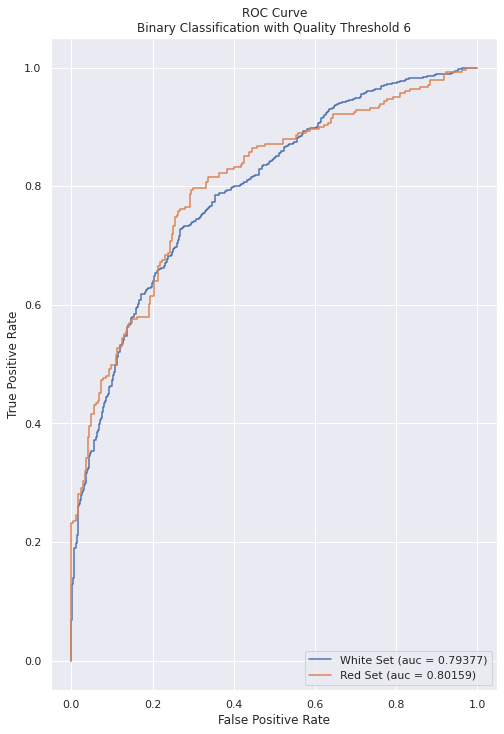

In [41]:
plt.figure(figsize=(8, 12))
plt.plot(fpr_white_binary, tpr_white_binary, label='White Set (auc = {:.5f})'.format(auc_white_binary))
plt.plot(fpr_red_binary, tpr_red_binary, label='Red Set (auc = {:.5f})'.format(auc_red_binary))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\nBinary Classification with Quality Threshold 6')
plt.legend(loc='lower right')
plt.show()

# Regression Model
### Red Wines
The same three-layered dense neural network is used. For regression, the activation function on the output layer is now linear and the loss function is mean squared error.

In [42]:
red_td_regress = red_df['quality'].to_numpy()

In [43]:
kfold_regress = StratifiedKFold(n_splits=5, shuffle=True, random_state=(10))

In [44]:
def create_regress_model_red():
    model = Sequential()
    model.add(Dense(12, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [45]:
red_model_evaluate_regress = KerasRegressor(build_fn=create_regress_model_red, epochs=500, batch_size=128, verbose=0)

In [46]:
def run_k_fold_red_regress():
    print('Executing k-fold cross validation, k=5. Red dataset regression model...')
    red_model_result_regress = cross_val_score(red_model_evaluate_regress, red_ds, red_td_regress, cv=kfold_regress)
    print('--------------\nComplete, average MSE: ' + '{:.2f}'.format(red_model_result_regress.mean()) + ' (' + '{:.2f}'.format(red_model_result_regress.std()) + ' std. dev.)\n--------------')
%timeit -n 1 -r 1 run_k_fold_red_regress()

Executing k-fold cross validation, k=5. Red dataset regression model...
--------------
Complete, average MSE: -0.44 (0.03 std. dev.)
--------------
17.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [47]:
red_ds_train_regress, red_ds_test_regress, red_td_train_regress, red_td_test_regress = train_test_split(red_ds, red_td_regress, test_size=0.33)

In [48]:
red_model_regress = create_regress_model_red()
red_model_regress.fit(red_ds_train_regress, red_td_train_regress, epochs=500, batch_size=128, verbose=0)
print('Red Regression Model Trained')

Red Regression Model Trained


### White Wines

The model is then evaluated using the white wine dataset. The number of nodes on the input layer is changed to 5.


In [49]:
white_td_regress = white_df['quality'].to_numpy()

In [50]:
def create_regress_model_white():
    model = Sequential()
    model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [51]:
white_model_evaluate_regress = KerasRegressor(build_fn=create_regress_model_white, epochs=500, batch_size=128, verbose=0)

In [52]:
def run_k_fold_white_regress():
    print('Executing k-fold cross validation, k=5. White dataset regression model...')
    white_model_result_regress = cross_val_score(white_model_evaluate_regress, white_ds, white_td_regress, cv=kfold_regress)
    print('--------------\nComplete, average MSE: ' + '{:.2f}'.format(white_model_result_regress.mean()) + ' (' + '{:.2f}'.format(white_model_result_regress.std()) + ' std. dev.)\n--------------')
%timeit -n 1 -r 1 run_k_fold_white_regress()

Executing k-fold cross validation, k=5. White dataset regression model...
--------------
Complete, average MSE: -0.59 (0.01 std. dev.)
--------------
51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
white_ds_train_regress, white_ds_test_regress, white_td_train_regress, white_td_test_regress = train_test_split(white_ds, white_td_regress, test_size=0.33)

In [54]:
white_model_regress = create_regress_model_white()
white_model_regress.fit(white_ds_train_regress, white_td_train_regress, epochs=500, batch_size=128, verbose=0)
print('White Regression Model Trained')

White Regression Model Trained


#### Comparing Regression Performance for Each Dataset

In [55]:
red_model_test_predict = red_model_regress.predict(red_ds_test_regress).flatten()
white_model_test_predict = white_model_regress.predict(white_ds_test_regress).flatten()

In [56]:
pd.DataFrame([[mean_squared_error(red_td_test_regress, red_model_test_predict), mean_squared_error(red_td_test_regress, red_model_test_predict, squared=False), 
               mean_absolute_error(red_td_test_regress, red_model_test_predict), max_error(red_td_test_regress, red_model_test_predict), 
               mean_absolute_percentage_error(red_td_test_regress, red_model_test_predict) * 100],
              [mean_squared_error(white_td_test_regress, white_model_test_predict), mean_squared_error(white_td_test_regress, white_model_test_predict, squared=False), 
               mean_absolute_error(white_td_test_regress, white_model_test_predict), max_error(white_td_test_regress, white_model_test_predict), 
               mean_absolute_percentage_error(white_td_test_regress, white_model_test_predict) * 100]], 
             columns=['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'Max Error (MA)', 'Max Absolute Percentage Error (MAPE)'], 
             index=['Red Dataset', 'White Dataset'])

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Max Error (MA),Max Absolute Percentage Error (MAPE)
Red Dataset,0.416118,0.645072,0.500527,1.973875,8.993786
White Dataset,0.621782,0.788531,0.603998,3.071491,10.417708


Although the binary classification model performed better on the white set, the opposite is true for the regression model.